In [28]:
import numpy as np
import matplotlib.pyplot as plt

#### Create Synthetic Dataset

In [29]:
np.random.seed(42)

beta0 = np.random.randint(0, 5)
beta1 = np.random.randint(0, 50)
beta2 = np.random.randint(0, 50)

X = np.random.rand(100, 2)
y = beta0 + ( beta1 * X[:, 0] + np.random.randint(0, 5)) + ( beta2 * X[:, 1] + np.random.randint(-5, 5))

Text(0.5, 0, 'output')

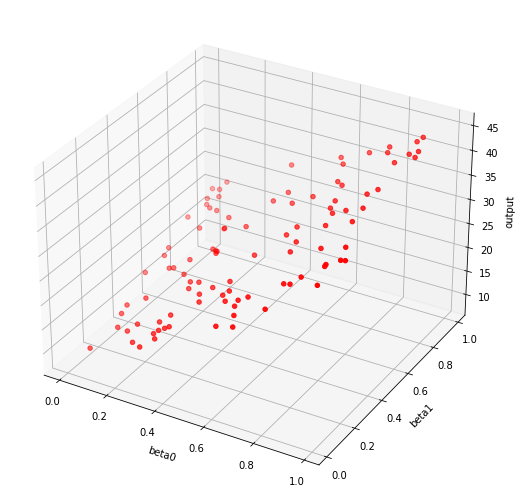

In [30]:
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c='red')
ax.set_xlabel('beta0')
ax.set_ylabel('beta1')
ax.set_zlabel('output')

#### Create Linear model

In [85]:
# can also do the easier closed form solution -> orthogonal projection onto the target hyperplane
class LinearModel(object):
    def __init__(self, X, y, lm_beta0, lm_beta1, lm_beta2):
        self.X_train = X
        self.y_train = y
        self.beta = np.array([[float(lm_beta0)], [float(lm_beta1)], [float(lm_beta2)]])

    def predict(self, X):
        return self.beta[0] + (self.beta[1] * X[:, 0]) + (self.beta[2] * X[:, 1])

    def train_model(self, n_iter=1000, eta=0.001):
        print(f'Training Started \nTraining set size => X: {self.X_train.shape} y: {self.y_train.shape}')
        
        for i in range(n_iter):
            print(f'iteration: {i + 1}')
            predictions = self.predict(self.X_train)
            errors = self.y_train - predictions

            gradients = np.zeros(self.beta.shape)

            gradients[0] = -2 * np.sum(errors)
            gradients[1] = -2 * np.sum(errors * self.X_train[:, 0] )
            gradients[2] = -2 * np.sum(errors * self.X_train[:, 1])

            self.beta -= eta * gradients
            
            print(f'Beta => {self.beta}')
        
        print(f'Training Completed...\n')

In [86]:
LM = LinearModel(X, y, np.random.randint(-5, 5), np.random.randint(-10, 10), np.random.randint(-10, 10))
LM.train_model()

Training Started 
Training set size => X: (100, 2) y: (100,)
iteration: 1
Beta => [[ 6.39924971]
 [ 0.65351204]
 [-5.59206906]]
iteration: 2
Beta => [[10.83919037]
 [ 3.29397054]
 [-3.17335666]]
iteration: 3
Beta => [[13.90431961]
 [ 5.22218418]
 [-1.44914779]]
iteration: 4
Beta => [[16.00494157]
 [ 6.64933422]
 [-0.21255844]]
iteration: 5
Beta => [[17.42907843]
 [ 7.72368416]
 [ 0.6816391 ]]
iteration: 6
Beta => [[18.37891182]
 [ 8.54932959]
 [ 1.33539053]]
iteration: 7
Beta => [[18.99636425]
 [ 9.19936042]
 [ 1.82025813]]
iteration: 8
Beta => [[19.38105706]
 [ 9.72510068]
 [ 2.1864754 ]]
iteration: 9
Beta => [[19.60291666]
 [10.16259468]
 [ 2.46930339]]
iteration: 10
Beta => [[19.71102404]
 [10.5371603 ]
 [ 2.69349269]]
iteration: 11
Beta => [[19.73982699]
 [10.86658534]
 [ 2.87641577]]
iteration: 12
Beta => [[19.71350099]
 [11.1633713 ]
 [ 3.0302658 ]]
iteration: 13
Beta => [[19.64901063]
 [11.43630856]
 [ 3.16360024]]
iteration: 14
Beta => [[19.55825851]
 [11.69158205]
 [ 3.2824243

In [87]:
test_x = np.array([X[0]])
print(f'Test -> X: {X[0]} y: {y[0]}')
print(f'Predict: {LM.predict(test_x)}')

Test -> X: [0.73199394 0.59865848] y: 34.877049149477855
Predict: [34.87697961]
